In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from zipfile import ZipFile
zpfile = ZipFile('BX-CSV-Dump.zip')

In [3]:
books_columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

In [4]:
# encoding='cp1252' also works
# books = pd.read_csv(zpfile.open('BX-Books.csv'), sep=';', header=0, 
#                     delimiter=";", error_bad_lines=False, encoding="latin-1")

In [5]:
# encoding='cp1252' also works
# delimiter play a very important role here in reading a CSV sep v/s delimiter
books = pd.read_csv(zpfile.open('BX-Books.csv'), delimiter=";", error_bad_lines=False, encoding="latin-1")

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/home/user/anaconda3/lib/python3.6/site-packages/IPython/core/interactives

In [6]:
books.shape

(271360, 8)

In [7]:
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

In [8]:
users = pd.read_csv(zpfile.open('BX-Users.csv'), delimiter=';', encoding='latin-1')

In [9]:
users.columns = ['userID', 'Location', 'Age']

In [10]:
users.shape

(278858, 3)

In [11]:
ratings = pd.read_csv(zpfile.open('BX-Book-Ratings.csv'), delimiter=';', encoding='latin-1')

In [12]:
ratings.columns = ['userID', 'ISBN', 'bookRating']

In [13]:
ratings.shape

(1149780, 3)

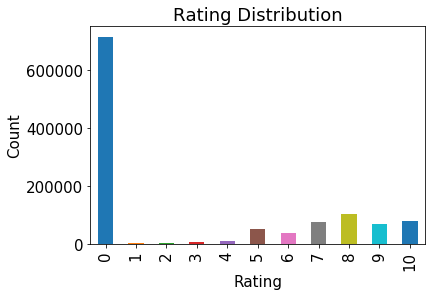

In [14]:
# plotting the graph based on user ratings
# Set the current rc params.  Group is the grouping for the rc
plt.rc('font', size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

The ratings are very unevenly distributed, and the vast majority of ratings are 0.

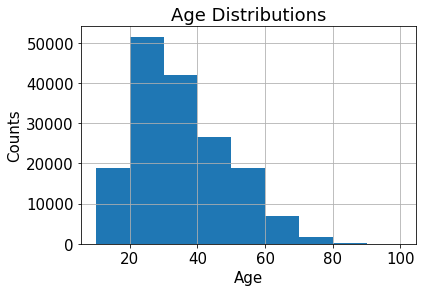

In [15]:
# Age distribution
users.Age.hist(bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('Age Distributions')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

The most active users are among those in their 20–30s.

__Recommendations based on rating counts__

In [16]:
ratings_count = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())

In [17]:
ratings_count.sort_values('bookRating', ascending=False).head()

,bookRating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


The book with ISBN “0971880107” received the most rating counts. Let’s find out what book it is, and what books are in the top 5.

In [18]:
rt = ratings_count.sort_values('bookRating', ascending=False).head()

In [19]:
list(rt.index)

['0971880107', '0316666343', '0385504209', '0060928336', '0312195516']

In [20]:
most_rated_books = pd.DataFrame(list(rt.index), index=np.arange(5), columns=['ISBN'])

In [21]:
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')

In [22]:
most_rated_books_summary

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...


__Recommendation based on correlation__

We use Pearsons’R correlation coefficient to measure linear correlation between two variables, in our case, the ratings for two books. First, we need to find out the average rating, and the number of ratings each book received.

In [23]:
average_rating = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].mean())

In [24]:
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())

In [25]:
average_rating.sort_values('ratingCount', ascending=False).head()

,bookRating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


Observations:

In this data set, the book that received the most rating counts was not highly rated at all. As a result, if we were to use recommendations based on rating counts, we would definitely make mistakes here. So, we need to have a better system.

To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are excluded.

In [26]:
counts1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)]

In [27]:
counts = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

Rating matrix:
 We convert the ratings table to a 2D matrix. The matrix will be sparse because not every user rated every book.

In [28]:
rating_pivot= ratings.pivot(index='userID', columns='ISBN').bookRating

In [32]:
userID = rating_pivot.index
ISBN = rating_pivot.columns
rating_pivot.shape

(905, 207699)

In [33]:
rating_pivot.head()

ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
userID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lets find out which books are correlated with the second most rated book “The Lovely Bones: A Novel”.

In [37]:
bones_ratings = rating_pivot['0316666343']
similar_to_bones = rating_pivot.corrwith(bones_ratings)

/home/user/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/user/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [39]:
corr_bones = pd.DataFrame(similar_to_bones, columns=['pearsonR'])
corr_bones.dropna(inplace=True)

In [41]:
corr_summary = corr_bones.join(average_rating['ratingCount'])
corr_summary[corr_summary['ratingCount'] >= 300].sort_values('pearsonR', ascending=False).head(10)

,pearsonR,ratingCount
ISBN,,
0316666343,1.000000,1295
0312291639,0.471872,354
0316601950,0.434248,568
0446610038,0.429712,391
0446672211,0.421478,585
0385265700,0.351635,319
0345342968,0.316922,321
0060930535,0.309860,494
0375707972,0.308145,354


We obtained the books’ ISBNs, but we need to find out the titles of the books to see whether they make sense.

In [42]:
isbn_list = corr_summary[corr_summary['ratingCount'] >= 300].sort_values('pearsonR', ascending=False).head(10)

In [51]:
# index can be or can not be specified bu
books_corr_to_bones = pd.DataFrame(list(isbn_list.index), columns=['ISBN'], index=np.arange(10))

In [52]:
books_corr_to_bones

,ISBN
0,0316666343
1,0312291639
2,0316601950
3,0446610038
4,0446672211
5,0385265700
6,0345342968
7,0060930535
8,0375707972
9,0684872153
